In [1]:
import random 
import matplotlib.pyplot as plt

# Tìm min hàm sphere: f(x) = x1^2 + x2^2 + ... + x6^2, x trong [-20,20]
n = 6 #số lượng cá thể (chromosome)
m = 50 #số lượng quần thể (population)
n_generations = 100 #số lượng thế hệ tiến hóa

losses = [] # dùng để vẽ biểu đồ quá trình tối ưu

def generate_random_value(bound = 20): 
    return (random.random()*2 - 1)* bound

def create_individual():
    return [generate_random_value() for _ in range(n)]

def compute_loss(individual):
    return sum(gen*gen for gen in individual) #loss = f(x)

#f(x) min khi 1/f(x) max -> Trong bài toán này, fitness = 1/loss
def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1/(loss+1) #để mẫu khác 0)
    return fitness

population = [create_individual() for _ in range(m)]

for ind in population:
    print(ind)

[2.198273737374792, 0.10090340299172773, 4.5627361036069125, 4.876979041695928, 17.25263688783756, -8.206875400012175]
[7.039794054022379, -14.2451575316772, 15.94816804549033, -19.574535093354083, -19.829512962315626, 8.580987354004591]
[13.941383636993478, 14.333469544909345, 17.822651450735677, 10.054124220119785, -10.283809931581217, 11.626000414883109]
[1.0410093333170423, -13.459194214576486, -4.5405463097292875, 16.502050952638573, -17.412448116578716, -13.760179820301115]
[10.060511770415864, -1.9227114471603457, -13.725174099755115, 7.6191410350577815, -5.9969214091304845, -4.184541162024296]
[0.11511542020802512, -16.52643448314761, 15.411780252385219, 6.295398575346702, -13.528026710170625, 9.318357857825212]
[-14.952502836067794, -9.815397138671731, 19.149857939853906, -4.561595467363957, -13.90960503064111, -4.685440042241975]
[19.230844563026245, -6.02917399019077, 6.6992342203802435, 17.67636541666811, 18.576274525368646, -5.049538974315371]
[12.732641298318557, 5.458261

In [2]:
def selection(sorted_old_population):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break
    individual_s = sorted_old_population[index1]
    if( index1 < index2):
        individual_s = sorted_old_population[index2]
    
    return individual_s

In [3]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
            
    return individual1_new, individual2_new

In [4]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
            
    return individual_m

Old Population
[-12.625703181766784, 2.381662772807771, 14.901757462387707, -0.12223410572717697, 2.0750299252393356, 7.944344574616733]
[-13.188365872402965, 16.93250333267333, -9.417445164063016, -3.676567309740082, -0.39043263736033396, -13.654080998626839]
[-12.632869567868234, 5.783969465378553, 12.103900772318074, 13.78075905569521, 13.601005684313673, 1.0586887336563322]
[13.508373889912235, -15.716523317356268, -8.745744022338329, -0.19586071084942258, 13.423943710097777, -2.503556849229378]
[17.98461821702499, -18.91951965001057, -6.381806181707992, -9.25536202106012, 11.195365173671634, 8.05908629796198]
[-2.0769247713002104, 3.1302327149572484, -8.217476543781927, 2.3654206571467284, -7.476201626745911, -13.991744060484601]
[18.355961984853693, -18.049737480072974, -14.415002448924144, -4.054639226607413, 6.075024785733332, -8.716784403095573]
[5.714446199975116, 11.071249500927088, -0.5421317765555322, -4.81907328712468, 12.522736743756692, 11.398283436081718]
[-13.05251611

[-0.11395362020172328, 15.488229487022082, 0.4029586570150867, 0.04352576993746915, 0.12059377493049972, 1.135115608544175]
[-0.11395362020172328, -0.3555720739279744, 0.4029586570150867, 0.04352576993746915, 0.12059377493049972, 1.135115608544175]
[-0.11395362020172328, -0.3555720739279744, 3.255467655944404, 0.04352576993746915, 0.12059377493049972, 1.135115608544175]
[-0.11395362020172328, -0.3555720739279744, 0.4029586570150867, 0.04352576993746915, 5.697633314136996, 1.135115608544175]
[-0.11395362020172328, -0.3555720739279744, 0.4029586570150867, -16.075430022477907, 3.7448886321071706, 1.135115608544175]
[-0.11395362020172328, -0.3555720739279744, 0.4029586570150867, 0.04352576993746915, 0.12059377493049972, 1.135115608544175]
[-0.11395362020172328, -0.3555720739279744, -0.44809301386924183, 0.04352576993746915, 0.12059377493049972, 1.135115608544175]
[-0.11395362020172328, -0.3555720739279744, -0.44809301386924183, 0.04352576993746915, 0.12059377493049972, 1.135115608544175]
[

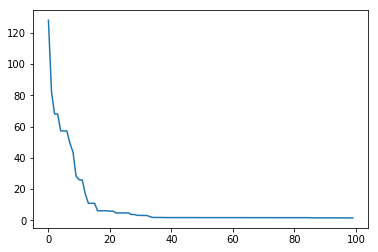

In [5]:
def create_new_population(old_population, elitism=2, gen=1):
     # key=compute_fitness -> Sắp xếp tăng dần
    sorted_population = sorted(old_population, key=compute_fitness)
    
    if gen%1==0: #in kết quả fitness 
        losses.append(compute_loss(sorted_population[m-1]))
        print("BEST LOSS: ", compute_loss(sorted_population[m-1]))
    
    new_population = []
    while len(new_population) < m-elitism:
        #selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population)
        
        #crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        #mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)
    
    for ind in sorted_population[m-elitism:]: 
        #Do có thể chromosome tốt nhất 
        #hiện tại có thể mất đi qua quá trình crossover và mutation. 
        #Do đó copy qua để đảm bảo nó không bị mất
        new_population.append(ind.copy())
        
    return new_population

population = [create_individual() for _ in range(m)]
    
print('Old Population')
for i in population:
    print(i)

for i in range(n_generations):
    population = create_new_population(population, 2, i)

print('New Population')
for i in population:
    print(i)

y = [i for i in range(n_generations)]
plt.plot(y, losses)
plt.show()